# 2次元ガウス乱数の生成と散布図

data [[-0.42750141 -0.51494743]
 [-1.09607563 -0.13282697]
 [ 0.296178    0.14809679]
 ...
 [-0.67182426  0.00499817]
 [ 0.30403353 -0.25371298]
 [ 0.3902578  -0.08085999]]
data.shape (1000, 2)
mean_vec [-0.04950248 -0.0134638 ]
cov_mat [[0.93674039 0.72919866]
 [0.72919866 0.93371387]]
corr_mat [[1.         0.77970323]
 [0.77970323 1.        ]]


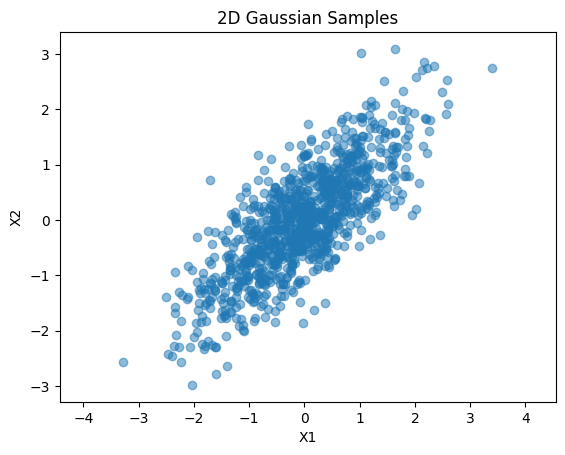

In [3]:
import numpy as np

# 乱数生成用のシードを設定
np.random.seed(42)
# 例：2次元正規分布から1000サンプル生成
mean = [0, 0]  # 平均ベクトル
cov = [[1, 0.8], [0.8, 1]]  # 共分散行列（相関あり）

data = np.random.multivariate_normal(mean, cov, size=1000)
print("data", data)
print("data.shape", data.shape) # (1000, 2)

# 平均ベクトル
mean_vec = np.mean(data, axis=0)  # => shape (2,)
print("mean_vec", mean_vec)
# 共分散行列
cov_mat = np.cov(data.T)  # => shape (2, 2)
print("cov_mat", cov_mat)
# 相関係数行列
corr_mat = np.corrcoef(data.T)  # => shape (2, 2)
corr_coef = corr_mat[0, 1]  # 相関係数ρ
print("corr_mat", corr_mat)


# 可視化
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Gaussian Samples')
plt.axis('equal')
plt.show()

# 鳥瞰図(2次元ガウス分布の図示)

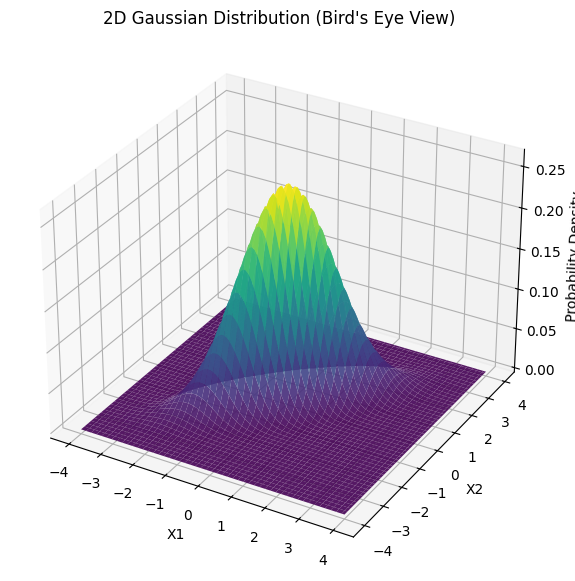

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# パラメータ設定
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]

# グリッド作成
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# 確率密度関数
rv = multivariate_normal(mean, cov)
Z = rv.pdf(pos)

# 3Dプロット
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Probability Density')
ax.set_title('2D Gaussian Distribution (Bird\'s Eye View)')
plt.show()